In [1]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load the datasets

data_sin_outliers = pd.read_csv("data_sin_outliers.csv", delimiter = ',')
print(f"Observaciones : {data_sin_outliers.shape[0]:,}")
print(f"Columnas      : {data_sin_outliers.shape[1]}")

df_dummies = pd.read_csv("df_dummiess.csv", delimiter = ',')
print(f"Observaciones : {df_dummiess.shape[0]:,}")
print(f"Columnas      : {df_dummiess.shape[1]}")

Observaciones : 92,914
Columnas      : 16
Observaciones : 100,000
Columnas      : 16


In [7]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y la variable objetivo (y)
X = df_dummies.drop('diabetes', axis=1)
y = df_dummies['diabetes']

X_SO = data_sin_outliers.drop('diabetes', axis=1)
y_SO = data_sin_outliers['diabetes']

# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_SO, X_test_SO, y_train_SO, y_test_SO = train_test_split(X_SO, y_SO, test_size=0.2, random_state=42)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define los modelos que deseas evaluar
models = [
    ("Regresión Logística", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier())
]

# Define la cantidad de "folds" para la validación cruzada
n_folds = 3

# Toma una muestra más pequeña de tus datos para acelerar la evaluación
sample_size = 0.2  # Puedes ajustar esto si es necesario

# Realiza validación cruzada para cada modelo y muestra las métricas
for name, model in models:
    print(f"Modelo: {name}")
    scores = cross_val_score(model, X_train.sample(frac=sample_size), y_train.sample(frac=sample_size), cv=n_folds)
    print(f"Puntuaciones de Validación Cruzada: {scores}")
    print(f"Puntuación Media de Validación Cruzada: {np.mean(scores)}")

    # Entrena y evalúa el modelo en el conjunto de prueba
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcula métricas de evaluación en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Precisión en conjunto de prueba: {precision}")
    print(f"Recall en conjunto de prueba: {recall}")
    print(f"F1-Score en conjunto de prueba: {f1}")
    print("\n")


Modelo: Regresión Logística
Puntuaciones de Validación Cruzada: [0.91451069 0.91468217 0.91468217]
Puntuación Media de Validación Cruzada: 0.9146250071450615
Precisión en conjunto de prueba: 0.8477157360406091
Recall en conjunto de prueba: 0.5866510538641686
F1-Score en conjunto de prueba: 0.6934256055363321


Modelo: Random Forest
Puntuaciones de Validación Cruzada: [0.91451069 0.91374461 0.91543221]
Puntuación Media de Validación Cruzada: 0.914562503238567
Precisión en conjunto de prueba: 0.942261427425822
Recall en conjunto de prueba: 0.6879391100702577
F1-Score en conjunto de prueba: 0.7952622673434857


Modelo: SVM
Puntuaciones de Validación Cruzada: [0.9128234  0.91280705 0.91280705]
Puntuación Media de Validación Cruzada: 0.9128124993188903
Precisión en conjunto de prueba: 1.0
Recall en conjunto de prueba: 0.3729508196721312
F1-Score en conjunto de prueba: 0.5432835820895523


Modelo: XGBoost
Puntuaciones de Validación Cruzada: [0.9128234  0.91130696 0.91111944]
Puntuación Media

In [9]:
# Define los modelos que deseas evaluar
models = [
    ("Regresión Logística", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier())
]

# Define la cantidad de "folds" para la validación cruzada
n_folds = 3

# Toma una muestra más pequeña de tus datos para acelerar la evaluación
sample_size = 0.2  # Puedes ajustar esto si es necesario

# Realiza validación cruzada para cada modelo y muestra las métricas en el conjunto SO
for name, model in models:
    print(f"Modelo: {name} - Conjunto SO")
    scores = cross_val_score(model, X_train_SO.sample(frac=sample_size), y_train_SO.sample(frac=sample_size), cv=n_folds)
    print(f"Puntuaciones de Validación Cruzada: {scores}")
    print(f"Puntuación Media de Validación Cruzada: {np.mean(scores)}")

    # Entrena y evalúa el modelo en el conjunto de prueba SO
    model.fit(X_train_SO, y_train_SO)
    y_pred_SO = model.predict(X_test_SO)
    
    # Calcula métricas de evaluación en el conjunto de prueba SO
    accuracy_SO = accuracy_score(y_test_SO, y_pred_SO)
    precision_SO = precision_score(y_test_SO, y_pred_SO)
    recall_SO = recall_score(y_test_SO, y_pred_SO)
    f1_SO = f1_score(y_test_SO, y_pred_SO)
    
    print(f"Precisión en conjunto de prueba SO: {precision_SO}")
    print(f"Recall en conjunto de prueba SO: {recall_SO}")
    print(f"F1-Score en conjunto de prueba SO: {f1_SO}")
    print("\n")

Modelo: Regresión Logística - Conjunto SO
Puntuaciones de Validación Cruzada: [0.92857143 0.92875883 0.92855701]
Puntuación Media de Validación Cruzada: 0.9286290903848927
Precisión en conjunto de prueba SO: 0.8557114228456913
Recall en conjunto de prueba SO: 0.6215429403202329
F1-Score en conjunto de prueba SO: 0.7200674536256324


Modelo: Random Forest - Conjunto SO
Puntuaciones de Validación Cruzada: [0.91908797 0.91967709 0.92028254]
Puntuación Media de Validación Cruzada: 0.9196825369677649
Precisión en conjunto de prueba SO: 0.9563451776649746
Recall en conjunto de prueba SO: 0.6855895196506551
F1-Score en conjunto de prueba SO: 0.7986434930055109


Modelo: SVM - Conjunto SO
Puntuaciones de Validación Cruzada: [0.92271994 0.92290616 0.92270434]
Puntuación Media de Validación Cruzada: 0.9227768099606167
Precisión en conjunto de prueba SO: 1.0
Recall en conjunto de prueba SO: 0.3544395924308588
F1-Score en conjunto de prueba SO: 0.523374529822676


Modelo: XGBoost - Conjunto SO
Pun

**Inferencia**

- Segun el analisis y en vista del desequilibrio de clases en conjunto con la importancia de detectar falsos positivos, el modelo que se ajusta mas a nuestros requerimientos es el xGboost en nuestro conjunto sin outliers (SO) ya que nos da el accuracy mas alto (0.95) y el f1-score mas alto (0.801)

In [10]:
from sklearn.model_selection import RandomizedSearchCV

# Define el modelo XGBoost
xgb_model = XGBClassifier()

# Define los hiperparámetros que deseas sintonizar
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Realiza la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=10,
    scoring='accuracy', cv=5, random_state=42, n_jobs=-1
)

# Ajusta el modelo a los datos
random_search.fit(X_train_SO, y_train_SO)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en el conjunto de prueba
y_pred = random_search.best_estimator_.predict(X_test_SO)
accuracy = accuracy_score(y_test_SO, y_pred)
precision = precision_score(y_test_SO, y_pred)
recall = recall_score(y_test_SO, y_pred)
f1 = f1_score(y_test_SO, y_pred)

print(f"Precisión en conjunto de prueba: {precision}")
print(f"Recall en conjunto de prueba: {recall}")
print(f"F1-Score en conjunto de prueba: {f1}")

Mejores hiperparámetros encontrados:
{'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Precisión en conjunto de prueba: 1.0
Recall en conjunto de prueba: 0.6775836972343523
F1-Score en conjunto de prueba: 0.8078091106290672


**Inferencia**

Según el análisis, los mejores hiperparámetros para nuestro modelo son los siguientes:

- `subsample`: 1.0
- `n_estimators`: 200
- `min_child_weight`: 4
- `max_depth`: 6
- `learning_rate`: 0.01
- `colsample_bytree`: 0.9

Estos hiperparámetros han sido determinados como los más óptimos para nuestro modelo después de un proceso de búsqueda y optimización.


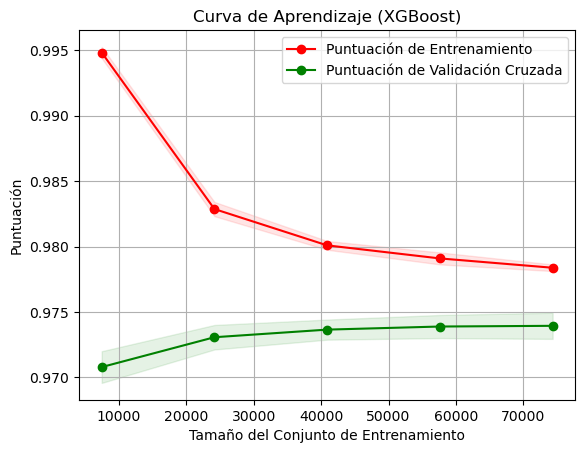

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera una curva de aprendizaje para evaluar si el modelo tiene sobreajuste.
    
    Parameters:
        estimator: Modelo de aprendizaje supervisado (clasificador o regresor)
        title: Título del gráfico
        X: Matriz de características
        y: Vector de etiquetas
        ylim: Tupla (ymin, ymax) para establecer los límites en el eje y
        cv: Estrategia de validación cruzada
        n_jobs: Número de núcleos CPU para calcular en paralelo (None para usar todos disponibles)
        train_sizes: Tamaños de conjunto de entrenamiento para los que se calcularán las puntuaciones de aprendizaje
    
    Returns:
        Gráfico de la curva de aprendizaje
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_SO, y_SO, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de Validación Cruzada")

    plt.legend(loc="best")
    return plt

# Uso del código:
title = "Curva de Aprendizaje (XGBoost)"
estimator = XGBClassifier()
plot_learning_curve(estimator, title, X_train_SO, y_train_SO, cv=5, n_jobs=-1)

plt.show()


**Inferencia**

- Según la curva de aprendizaje obtenida la brecha disminuye a medida que aumenta el tamaño del conjunto de entrenamiento, lo que es una indicación de que el sobreajuste se está reduciendo.

## Conclusión sobre la Importancia de Detectar Casos de Diabetes

La detección temprana y precisa de casos de diabetes es fundamental para mejorar la calidad de vida de los pacientes, reducir los costos de atención médica y promover estilos de vida saludables. Algunas conclusiones clave en relación a las métricas obtenidas con nuestro modelo de predicción de diabetes son:

- **Mejora en la Calidad de Vida:** La detección temprana permite un manejo efectivo de la diabetes, reduciendo el riesgo de complicaciones graves y mejorando la calidad de vida.

- **Reducción de Costos:** Ayuda a reducir los costos asociados con tratamientos médicos intensivos y hospitalizaciones.

- **Promoción de Estilos de Vida Saludables:** La detección fomenta hábitos más saludables, como una alimentación adecuada y el ejercicio regular.

- **Prevención de Complicaciones:** Contribuye a prevenir o retrasar complicaciones de la enfermedad.

- **Identificación de Factores de Riesgo:** Permite identificar a personas en riesgo y aplicar medidas preventivas.

En relación a nuestro modelo, las métricas obtenidas, como la precisión, el recall y el F1-Score, indican su capacidad para detectar casos de diabetes. Estas métricas son esenciales para evaluar la eficacia del modelo y su utilidad en la práctica clínica.